In [1]:
# importing library
import pandas as pd

In [2]:
df1 = pd.read_csv("Retail_Data_Transactions.csv")

In [3]:
df2 = pd.read_csv("Retail_Data_Response.csv")

In [4]:
data = df1.merge(df2,on = "customer_id", how = "left")

### Understanding Dataset

In [5]:
data.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [6]:
data.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  125000 non-null  object 
 1   trans_date   125000 non-null  object 
 2   tran_amount  125000 non-null  int64  
 3   response     124969 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [8]:
data.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [9]:
data.shape

(125000, 4)

## Data Cleaning

In [ ]:
# check missing values
data.isnull().sum()


In [11]:
# drop missing values
data = data.dropna()

In [12]:
data

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [13]:
#change datatype
data['trans_date'] = pd.to_datetime(data['trans_date'])
data['response'] = data['response'].astype('int64')

/var/folders/_2/zdfxqbhs73163x6xvz2scvvr0000gn/T/ipykernel_83705/2284167848.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['trans_date'] = pd.to_datetime(data['trans_date'])


In [14]:
data

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [15]:
data.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [16]:
#check for outliers
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(data['tran_amount']))

threshold = 3

outliers=z_scores>threshold
print(data[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [17]:
#check for outliers
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(data['response']))

threshold = 3

outliers=z_scores>threshold
print(data[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


### Business Analysis

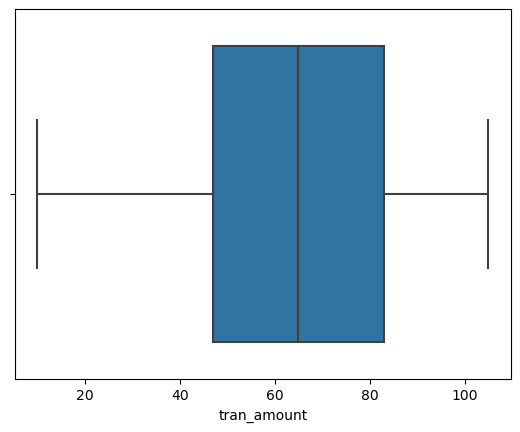

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['tran_amount'])
plt.show()

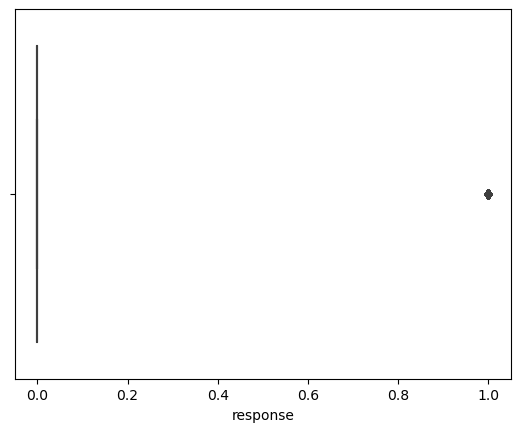

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['response'])
plt.show()

In [20]:
# creating new columns

data['month']= data['trans_date'].dt.month

In [21]:
data

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [22]:
# Which 3 months have had the highest transaction amounts?

monthly_Sales= data.groupby('month')['tran_amount'].sum().sort_values(ascending=False).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [23]:
customer_counts = data['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','counts']

top5_cus = customer_counts.sort_values(by='counts', ascending=False).head(5)
top5_cus

,customer_id,counts
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='counts'>

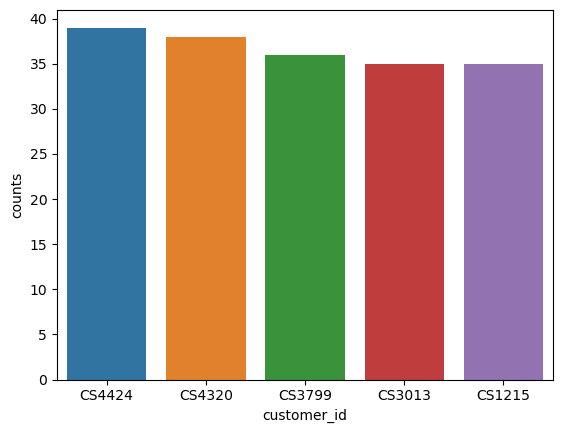

In [24]:
sns.barplot(x='customer_id',y='counts',data=top5_cus)

In [25]:
# Customers having highest value of orders

customer_sales= data.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

# sort

top_5_sal= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

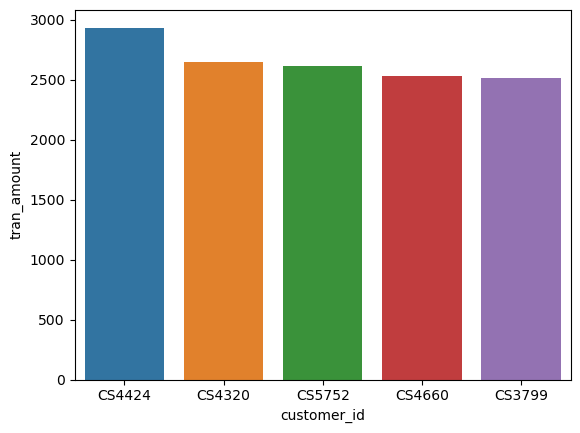

In [26]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

# Advanced Analytics

### Time Series Analysis

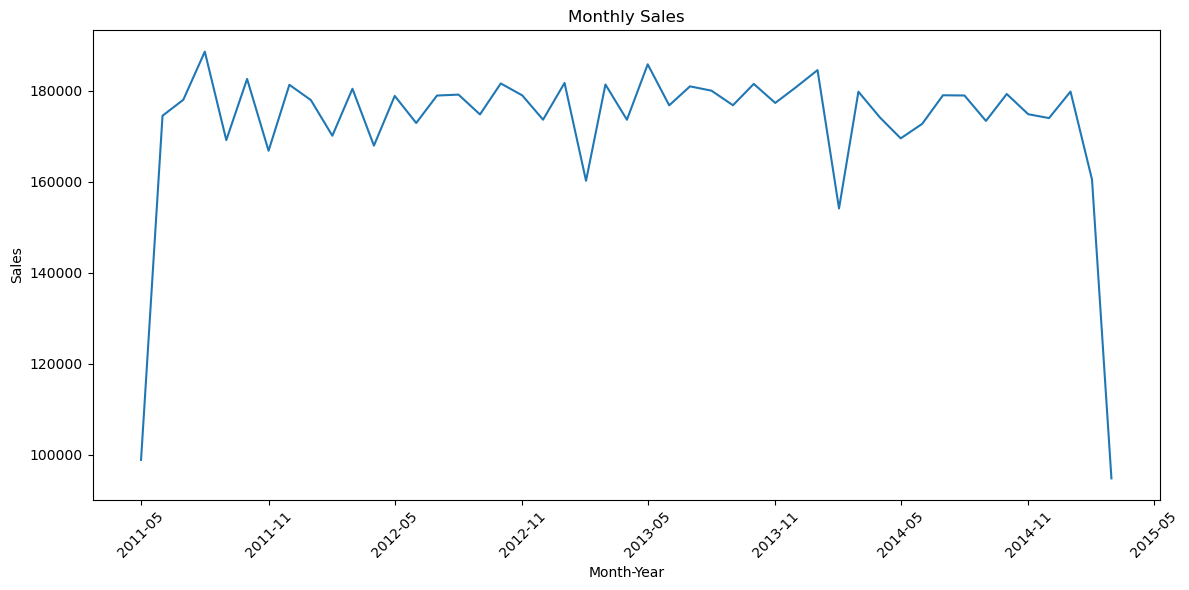

In [45]:
# import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data['month_year'] = data['trans_date'].dt.to_period('M')
monthly_sales = data.groupby('month_year')['tran_amount'].sum()

# Convert the PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))  # Increase the size of the figure
plt.plot(monthly_sales.index, monthly_sales.values)  # Plot the data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set the x-axis interval
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()

### Cohort Segmentation

In [46]:
# Recency will be the maximum of trans_date
recency = data.groupby('customer_id')['trans_date'].max()

# Frequency will be the count of transactions
frequency = data.groupby('customer_id')['trans_date'].count()

# Monetary will be the sum of tran_amount
monetary = data.groupby('customer_id')['tran_amount'].sum()

# Combine all three into a DataFrame
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})

In [47]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [48]:
def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 25 and row['monetary'] > 1000:
        return 'Premium-P0'
    elif row['recency'].year >= 2012 and (10 < row['frequency'] <= 24) and (600 < row['monetary'] <= 1000):
        return 'Gold-P1'
    else:
        return 'Silver-P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [49]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,Silver-P2
CS1113,2015-02-09,20,1490,Silver-P2
CS1114,2015-02-12,19,1432,Silver-P2
CS1115,2015-03-05,22,1659,Silver-P2
CS1116,2014-08-25,13,857,Gold-P1
...,...,...,...,...
CS8996,2014-12-09,13,582,Silver-P2
CS8997,2014-06-28,14,543,Silver-P2
CS8998,2014-12-22,13,624,Gold-P1


### Churn Analysis

<Axes: xlabel='response'>

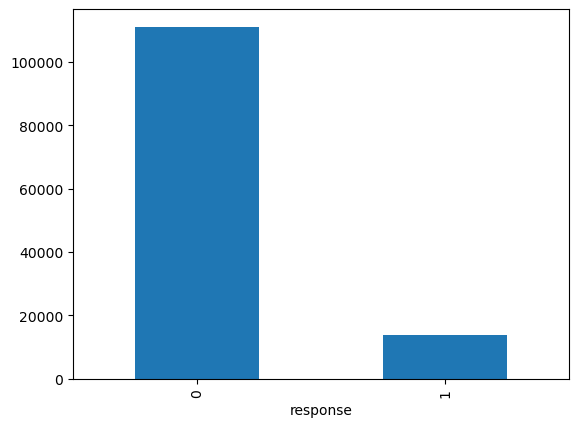

In [39]:
# Count the number of churned and active customers
churn_counts = data['response'].value_counts()

# Plot
churn_counts.plot(kind='bar')

### Analyzing top customers

<Axes: xlabel='month_year'>

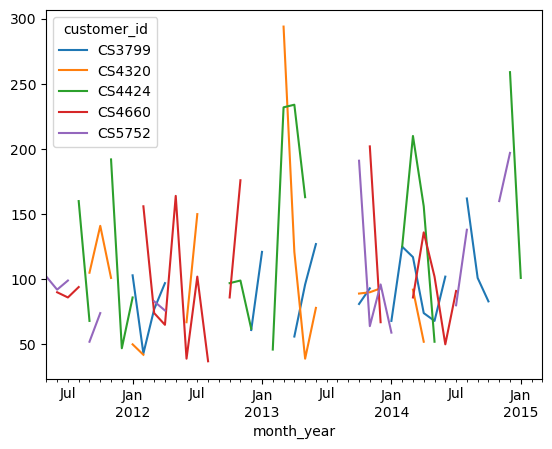

In [40]:
# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index

# Filter transactions of top 5 customers
top_customers_df = data[data['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')

### Export the data to csv for further analysis in excel

In [41]:
data.to_csv("MainData.csv")

In [42]:
rfm.to_csv("AddAnalysis.csv")